In [52]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [53]:
df=pd.read_csv('fake_job_postings.csv')
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [54]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

C:\Users\Laukit\AppData\Local\Temp/ipykernel_9688/2355120285.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), square = True)


<AxesSubplot:>

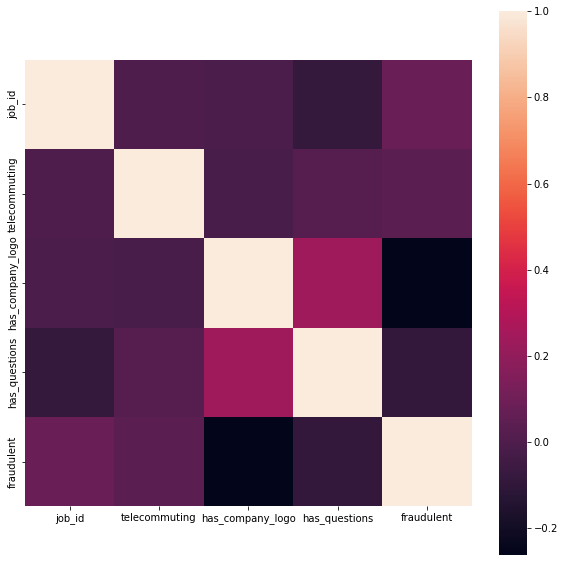

In [58]:
plt.figure(figsize = (10,10))
correlation = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), square = True)

In [24]:
df.shape

(17880, 18)

In [25]:
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [26]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [27]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [28]:
df.fillna(" ", inplace=True)

In [29]:
df.drop(['salary_range','job_id'], axis=1, inplace=True)

In [30]:
df['job_description'] = df['title'] + ' ' + df['location'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_experience'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] + ' ' + df['department'] 

In [31]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,job_description
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern US, NY, New York We're Food52..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC US, DC, Wash..."
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [32]:
df.drop(['title','location','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department'], axis = 1, inplace= True)

In [33]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,job_description
0,0,1,0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [34]:
df['job_description'][1]

"Customer Service - Cloud Video Production NZ, , Auckland 90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including 

In [35]:
import re
import string
import nltk
from nltk.corpus import stopwords
df['job_description'] = df['job_description'].str.replace('http\S+', ' ', regex=True)
df['job_description'] = df['job_description'].str.replace('http', ' ', regex=True)
df['job_description'] = df['job_description'].str.replace('@\S+', ' ', regex=True)
df['job_description'] = df['job_description'].str.replace('[^A-Za-z0-9]+', ' ', regex=True)
df['job_description'] = df['job_description'].str.replace('[!"#$%&\'()*+,-./:;<=>?\\^_`{|}~]+', ' ', regex=True)
df['job_description']  = df['job_description'] .str.replace("@", "at", regex=True)
df['job_description'] = df['job_description'].str.lower()


In [36]:
df['job_description'][1]

'customer service cloud video production nz auckland 90 seconds the worlds cloud video production service 90 seconds is the worlds cloud video production service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world 90 seconds makes video production fast affordable and all managed seamlessly in the cloud from purchase to publish seconds removes the hassle cost risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience with a growing global network of over 2 000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries 90 seconds provides a 100 success guarantee 90 seconds has produced almost 4 000 videos in over 30 countries for over 500 global brands including some of the worlds largest including paypal l oreal sony and barclays and has offices in auckland london sydney tokyo and singapore or

In [37]:
df['job_description']=df['job_description'].str.translate(str.maketrans('', '',string.punctuation))
stopWords=stopwords.words('english')+['the', 'a','an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt
df['job_description'] = [removeStopWords(stopWords,x) for x in df['job_description']]

In [38]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.lower().split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
df['job_description'] = df['job_description'].apply(stem_sentences)

In [39]:
df['job_description'][1]

'custom servic cloud video product nz auckland 90 second world cloud video product servic 90 second world cloud video product servic enabl brand agenc get high qualiti onlin video content shot produc anywher world 90 second make video product fast afford manag seamlessli cloud purchas publish second remov hassl cost risk speed issu work regular video product compani manag everi aspect video project beauti onlin experi grow global network 2 000 rate video profession 50 countri manag dedic product success team 5 countri 90 second provid 100 success guarante 90 second produc almost 4 000 video 30 countri 500 global brand includ world largest includ paypal l oreal soni barclay offic auckland london sydney tokyo singapor organis focus vibrant awesom passion custom servic slick type skill mayb account manag think administr cooler polar bear jetski need hear cloud video product servic opper glodal level yeah pretti cool seriou deliv world class product excel custom servic rapidli expand busi 

<AxesSubplot:xlabel='fraudulent', ylabel='Count'>

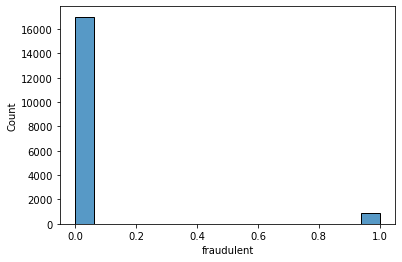

In [40]:
import seaborn as sns
sns.histplot(df["fraudulent"])

In [41]:
df

,telecommuting,has_company_logo,has_questions,fraudulent,job_description
0,0,1,0,0,market intern us ny new york food52 creat grou...
1,0,1,0,0,custom servic cloud video product nz auckland ...
2,0,1,0,0,commiss machineri assist cma us ia wever valor...
3,0,1,0,0,account execut washington dc us dc washington ...
4,0,1,1,0,bill review manag us fl fort worth spotsourc s...
...,...,...,...,...,...
17875,0,1,1,0,account director distribut ca toronto vend loo...
17876,0,1,1,0,payrol account us pa philadelphia weblinc e co...
17877,0,0,0,0,project cost control staff engin cost control ...
17878,0,0,1,0,graphic design ng la lago nemsia studio look e...


In [42]:
from nltk.tokenize import word_tokenize
#splitting text into words
tokenList=[]
for indx in range(len(df)):
       token=word_tokenize(df['job_description'][indx])
       tokenList.append(token)
df['job_description2'] = tokenList
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,job_description,job_description2
0,0,1,0,0,market intern us ny new york food52 creat grou...,"[market, intern, us, ny, new, york, food52, cr..."
1,0,1,0,0,custom servic cloud video product nz auckland ...,"[custom, servic, cloud, video, product, nz, au..."
2,0,1,0,0,commiss machineri assist cma us ia wever valor...,"[commiss, machineri, assist, cma, us, ia, weve..."
3,0,1,0,0,account execut washington dc us dc washington ...,"[account, execut, washington, dc, us, dc, wash..."
4,0,1,1,0,bill review manag us fl fort worth spotsourc s...,"[bill, review, manag, us, fl, fort, worth, spo..."


In [43]:
from sklearn.model_selection import train_test_split
y = df['fraudulent']
X = df['job_description2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
def dummy_fun(rev):
    return rev
tfidf = TfidfVectorizer(analyzer='word',tokenizer=dummy_fun,preprocessor=dummy_fun,token_pattern=None)  
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(14304, 77128)
(3576, 77128)


In [45]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss()
X_train_nm, y_train_nm = undersample.fit_resample(X_train_tfidf, y_train.ravel())
X_test_nm, y_test_nm = undersample.fit_resample(X_test_tfidf, y_test.ravel())

In [46]:
from sklearn.linear_model import LogisticRegression
# clf_log = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',multi_class='multinomial', random_state=40)
from sklearn.metrics import confusion_matrix , classification_report
model1=LogisticRegression()
model1.fit(X_train_nm, y_train_nm)
y_predicted = model1.predict(X_test_nm)
print(classification_report(y_test_nm, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       188
           1       0.89      0.89      0.89       188

    accuracy                           0.89       376
   macro avg       0.89      0.89      0.89       376
weighted avg       0.89      0.89      0.89       376



In [47]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train_nm,y_train_nm)
y_pred = model2.predict(X_test_nm)
print(classification_report(y_test_nm, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       188
           1       0.83      0.83      0.83       188

    accuracy                           0.83       376
   macro avg       0.83      0.83      0.83       376
weighted avg       0.83      0.83      0.83       376



In [48]:
from sklearn import svm
model3=svm.SVC(kernel='poly')
model3.fit(X_train_nm,y_train_nm)
y_prediction = model3.predict(X_test_nm)
print(classification_report(y_test_nm, y_prediction))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       188
           1       0.87      0.95      0.91       188

    accuracy                           0.91       376
   macro avg       0.91      0.91      0.91       376
weighted avg       0.91      0.91      0.91       376



In [49]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
print("ROC-AUC:", roc_auc_score(y_prediction,y_test_nm))
print("Accuracy:", accuracy_score(y_prediction,y_test_nm))

ROC-AUC: 0.9102695763799743
Accuracy: 0.9069148936170213


**TFIdfVectorizer method with unbalanced data**

In [50]:
model3=LogisticRegression(C=30.0,class_weight='balanced', solver='newton-cg',multi_class='multinomial', random_state=40)
model3.fit(X_train_tfidf,y_train)
y_pre = model3.predict(X_test_tfidf)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3388
           1       0.91      0.80      0.85       188

    accuracy                           0.99      3576
   macro avg       0.95      0.90      0.92      3576
weighted avg       0.98      0.99      0.98      3576



In [51]:
print("ROC-AUC:", roc_auc_score(y_pre,y_test))
print("Accuracy:", accuracy_score(y_pre,y_test))

ROC-AUC: 0.9517484916935921
Accuracy: 0.9854586129753915
